In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os



######  The glob module in Python is used to find all the pathnames matching a specified pattern according to the rules used by the Unix shell

In [2]:
import glob 

In [3]:
file_pattern = r"C:\Users\shubh\OneDrive\Documents\time_series_project\individual_stocks_5yr\*.csv"
glob.glob(file_pattern)

['C:\\Users\\shubh\\OneDrive\\Documents\\time_series_project\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\shubh\\OneDrive\\Documents\\time_series_project\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\shubh\\OneDrive\\Documents\\time_series_project\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\shubh\\OneDrive\\Documents\\time_series_project\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\shubh\\OneDrive\\Documents\\time_series_project\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\shubh\\OneDrive\\Documents\\time_series_project\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\shubh\\OneDrive\\Documents\\time_series_project\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\shubh\\OneDrive\\Documents\\time_series_project\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\shubh\\OneDrive\\Documents\\time_series_project\\individual_stocks_5yr\\ADI_data.csv',
 'C:\\Users\\shubh\\OneDrive\\Documents\\time_series_project\\individual_stocks_5yr\\ADM_data.csv

In [4]:
len(glob.glob(file_pattern))

505

In [5]:
company_list = [
    r'C:\\Users\\shubh\\OneDrive\\Documents\\time_series_project\\individual_stocks_5yr\\AAPL_data.csv',
    r'C:\\Users\\shubh\\OneDrive\\Documents\\time_series_project\\individual_stocks_5yr\\AMZN_data.csv',
    r'C:\\Users\\shubh\\OneDrive\\Documents\\time_series_project\\individual_stocks_5yr\\GOOG_data.csv',
    r'C:\\Users\\shubh\\OneDrive\\Documents\\time_series_project\\individual_stocks_5yr\\MSFT_data.csv'
]

In [6]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
dataframes = []

# Loop through the list of files and read them into DataFrames
for file in company_list:
    current_df = pd.read_csv(file)
    dataframes.append(current_df)

# Concatenate all the DataFrames into one
all_data = pd.concat(dataframes, ignore_index=True)

In [8]:
all_data.shape




(4752, 7)

In [9]:
all_data.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL


In [10]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

#### Analysing change  in price of the stock overtime

In [11]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [12]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

##### Coverting the date type into  Datetime64[ns]

In [13]:
all_data["date"]= pd.to_datetime(all_data['date'])

In [14]:
tech_list=all_data['Name'].unique()

##### enumerate(tech_list, 1): This function provides both the index and the company name, starting the index from 1.
##### plt.subplot(2, 2, index): This creates a subplot grid of 2 rows and 2 columns and places each company’s plot in the corresponding cell.
##### plt.plot(data[company]['Date'], data[company]['Close']): This plots the closing price of the company over time.

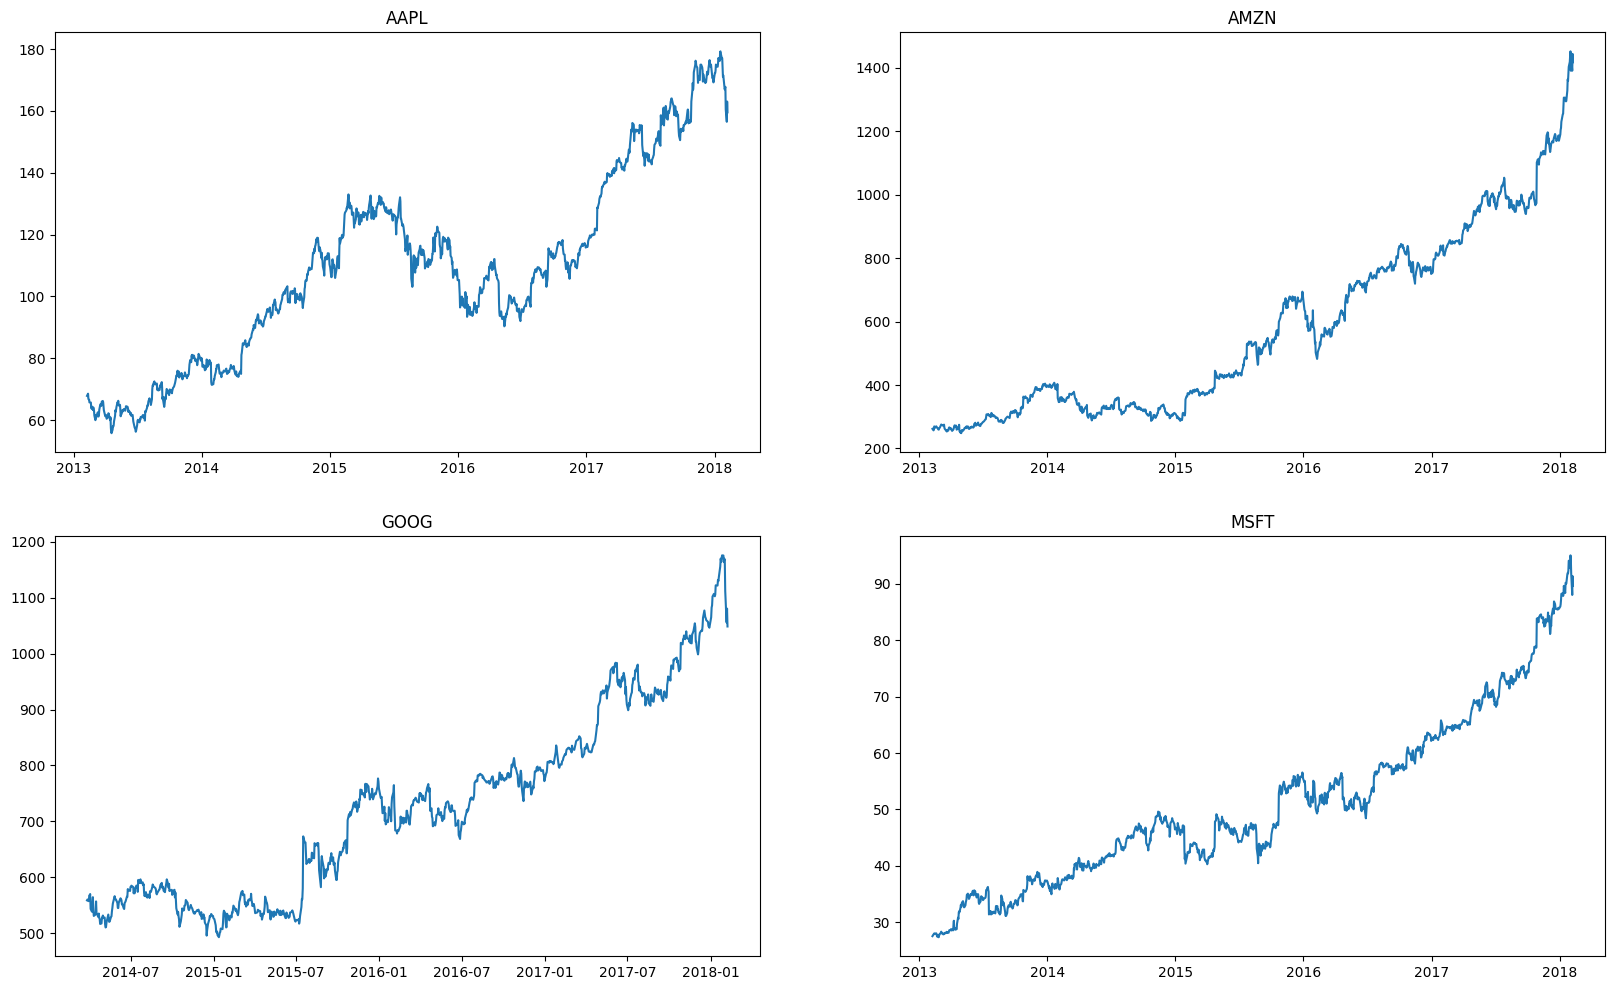

In [15]:
plt.figure(figsize=(20,12))
for index ,company  in  enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1=all_data["Name"]==company
    df=all_data[filter1]
    plt.plot(df["date"], df["close"])
    plt.title(company)

- **Apple**:
  - Open: 67
  - Maximum Price: 180

- **Google**:
  - Open: 570
  - Maximum Price: 1180

- **Microsoft**:
  - Open: 28
  - Maximum Price: 96

- **Amazon**:
  - Open: 250
  - Maximum Price: 1457


#### Analysing  moving  average of the various Stock

###### A moving average is a widely used technical indicator in stock analysis that helps smooth out price data by creating a constantly updated average price. This is done over a specific number of periods, such as days, weeks, or months, and it helps identify trends by filtering out the "noise" of short-term price fluctuations.

​


$$
\text{SMA} = \frac{\text{Sum of closing prices over the period}}{\text{Number of periods}}
$$


In [16]:
all_data['close'].rolling(window=10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

#### The rolling() function in pandas is used to perform operations over a sliding window of data. This is particularly useful in time series analysis, including stock data analysis, where you often want to compute statistics (like moving averages) over a specific window of time

In [17]:
new_data=all_data.copy()

In [18]:
ma_day=[10,20,50]

for ma in ma_day:
    new_data['close_ '+str(ma)] =new_data['close'].rolling(ma).mean()

In [19]:
new_data.tail(7)

,date,open,high,low,close,volume,Name,close_ 10,close_ 20,close_ 50
4745,2018-01-30,93.30,93.660,92.1000,92.74,38635053,MSFT,91.862,89.8285,86.5244
4746,2018-01-31,93.75,95.400,93.5100,95.01,48756338,MSFT,92.349,90.2815,86.7606
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


In [20]:
new_data.set_index('date',inplace=True)

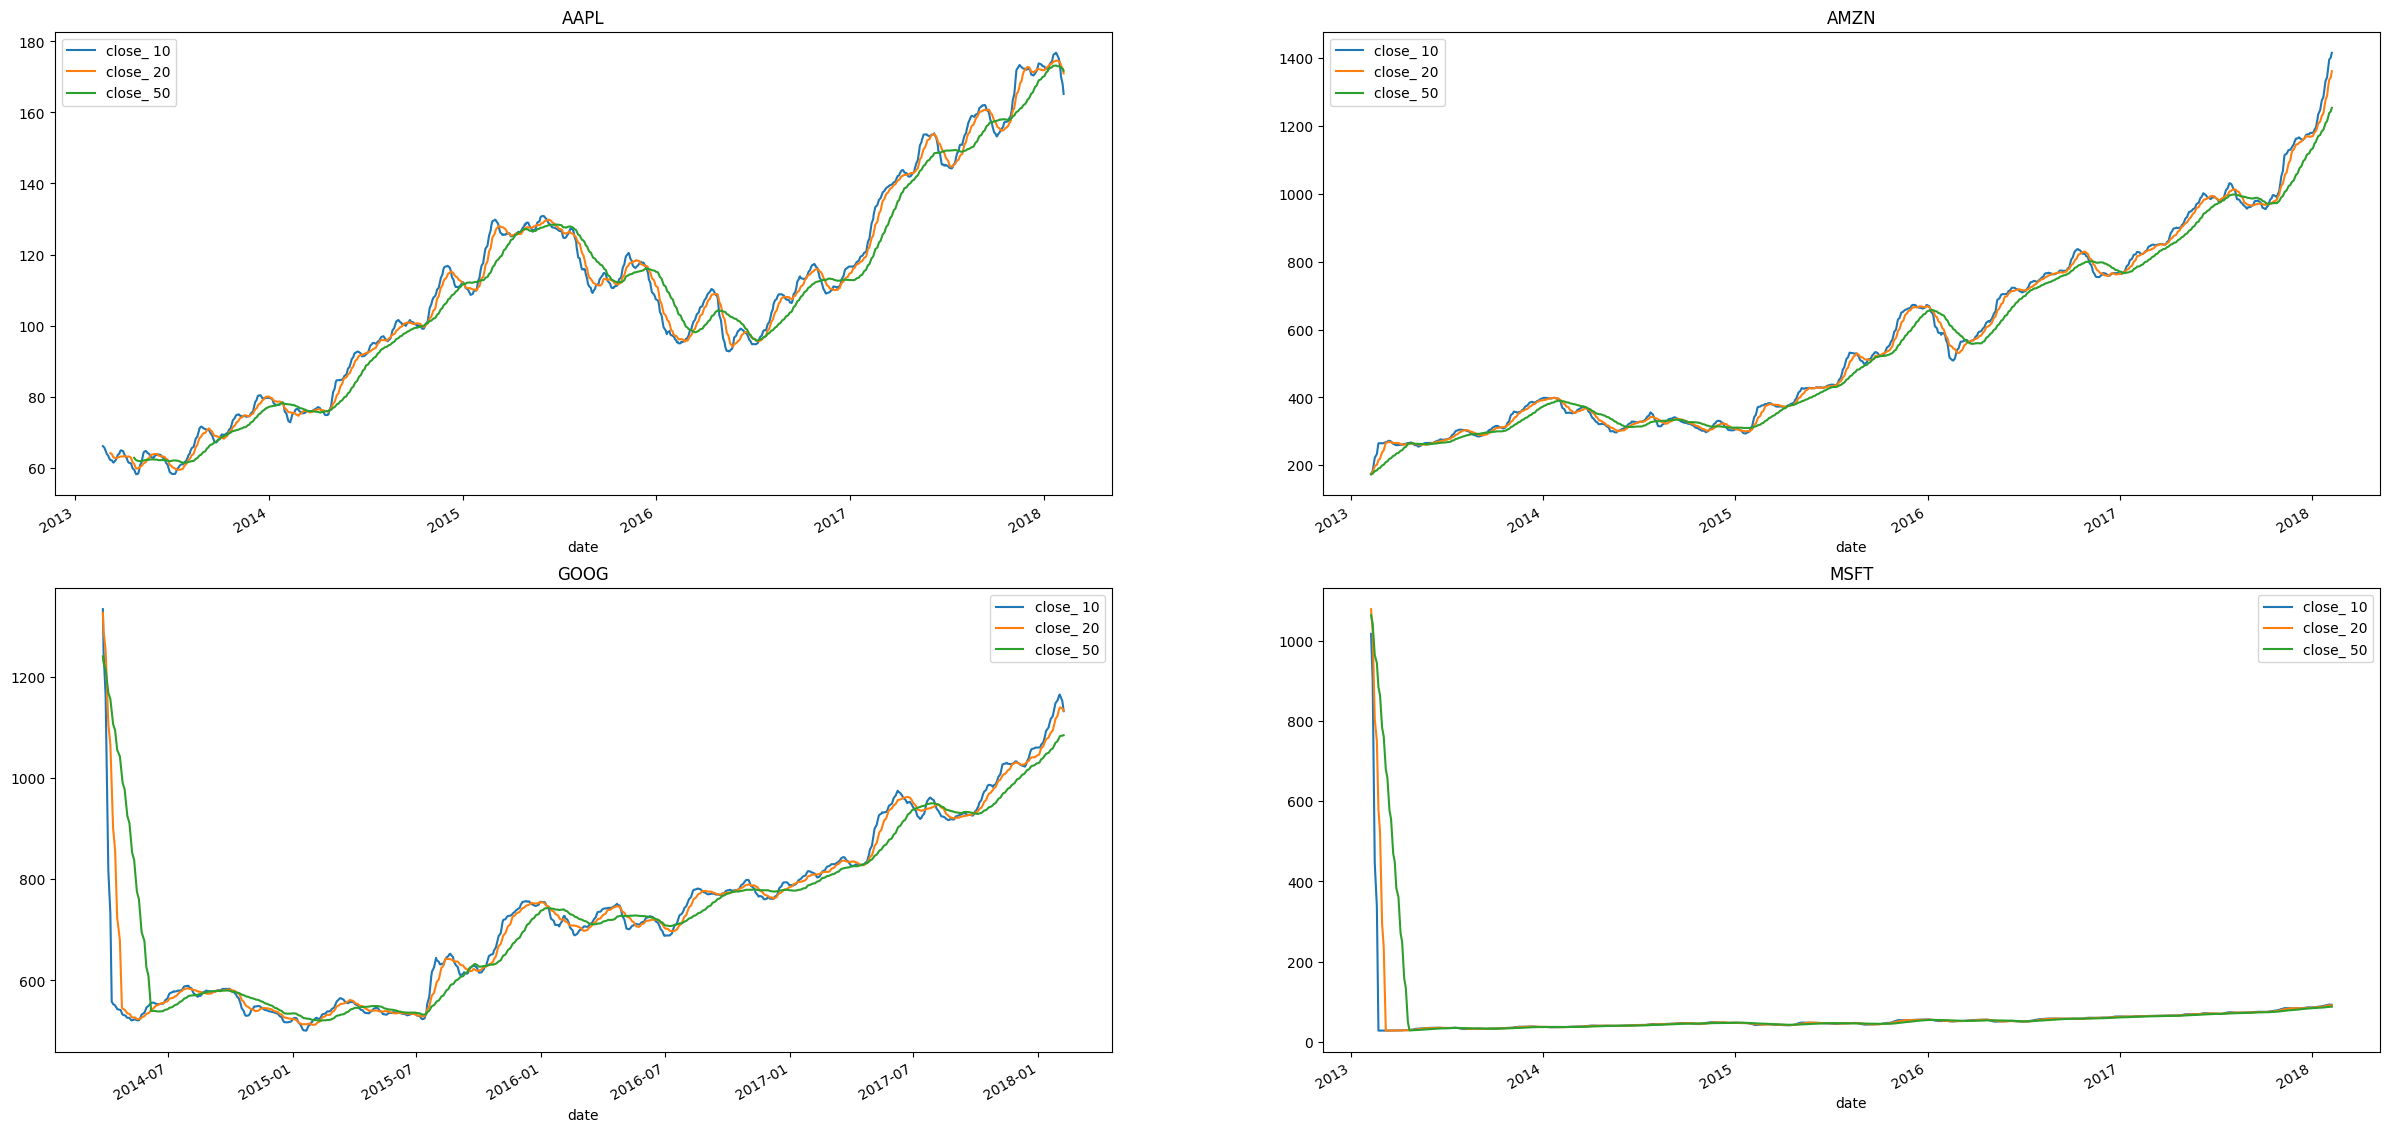

In [21]:
plt.figure(figsize=(30,15))
for index ,company  in  enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1=new_data["Name"]==company
    df=new_data[filter1]
    df[[ 'close_ 10','close_ 20', 'close_ 50']].plot(ax=plt.gca())#Get currect axis
    plt.title(company)

#### Smoothing Effect: In all graphs, the 50-day moving average (green line) is smoother and less volatile compared to the 10-day and 20-day moving averages. This is because a longer window (50 days) averages out more data points, reducing the impact of short-term fluctuations.
#### Trend Identification: The 50-day moving average is useful for identifying longer-term trends, as it filters out the "noise" or short-term volatility seen in shorter moving averages.

#### Observing closing  price change in apple stock

In [22]:
apple=pd.read_csv(r'C:\\Users\\shubh\\OneDrive\\Documents\\time_series_project\\individual_stocks_5yr\\AAPL_data.csv')

In [23]:
apple.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [24]:
apple['Daily return (in %)'] = apple['close'].pct_change() * 100


###### The .pct_change() function in pandas is used to calculate the percentage change between the current and a prior element in a DataFrame or Series

The formula for percentage change is $ \frac{{\text{{current value}} - \text{{previous value}}}}{{\text{{previous value}}}} \times 100 $.


In [25]:
apple.head()

,date,open,high,low,close,volume,Name,Daily return (in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [26]:
import plotly.express as px

In [27]:
px.line(apple, x='date', y='Daily return (in %)')


### Performing resampling Analysis 

In [28]:
apple['date']=pd.to_datetime(apple['date'])

In [29]:
apple.set_index('date',inplace=True)

In [30]:
apple.head(4)

,open,high,low,close,volume,Name,Daily return (in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


<Axes: xlabel='date'>

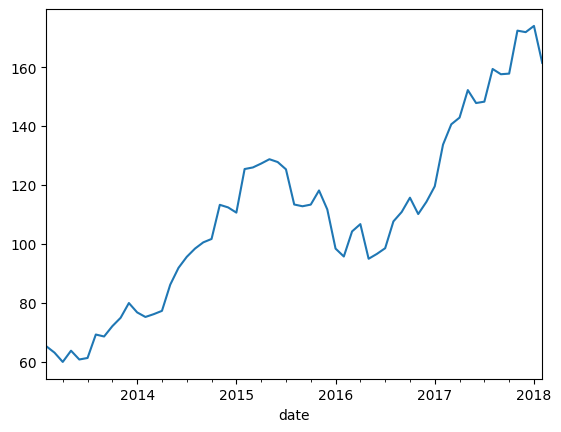

In [34]:
apple['close'].resample('M').mean().plot()

<Axes: xlabel='date'>

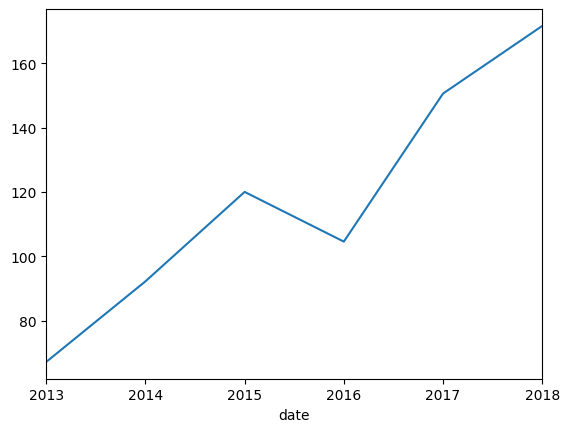

In [35]:
apple['close'].resample('Y').mean().plot()

<Axes: xlabel='date'>

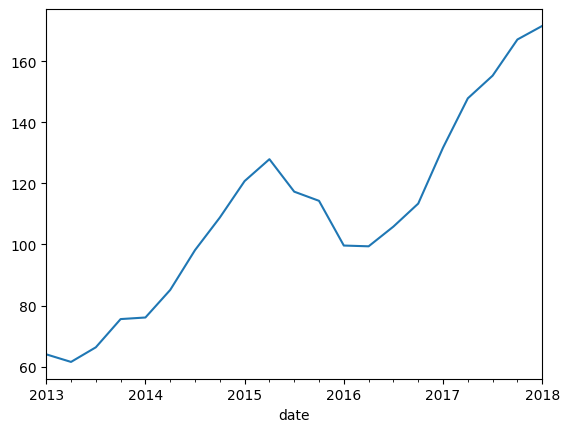

In [36]:
apple['close'].resample('Q').mean().plot()

### Perform Multi-Variate Analysis to understand co-relation

In [37]:
company_list

['C:\\\\Users\\\\shubh\\\\OneDrive\\\\Documents\\\\time_series_project\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\shubh\\\\OneDrive\\\\Documents\\\\time_series_project\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\shubh\\\\OneDrive\\\\Documents\\\\time_series_project\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\shubh\\\\OneDrive\\\\Documents\\\\time_series_project\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [39]:
app=pd.read_csv((company_list[0]))
amzn=pd.read_csv((company_list[1]))
google=pd.read_csv((company_list[2]))
msft=pd.read_csv((company_list[3]))

In [40]:
closing_price=pd.DataFrame()

In [41]:
closing_price['apple_close']=app['close']
closing_price['amzn_close']=amzn['close']
closing_price['goolge_close']=google['close']
closing_price['msft_close']=msft['close']


In [42]:
closing_price

,apple_close,amzn_close,goolge_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


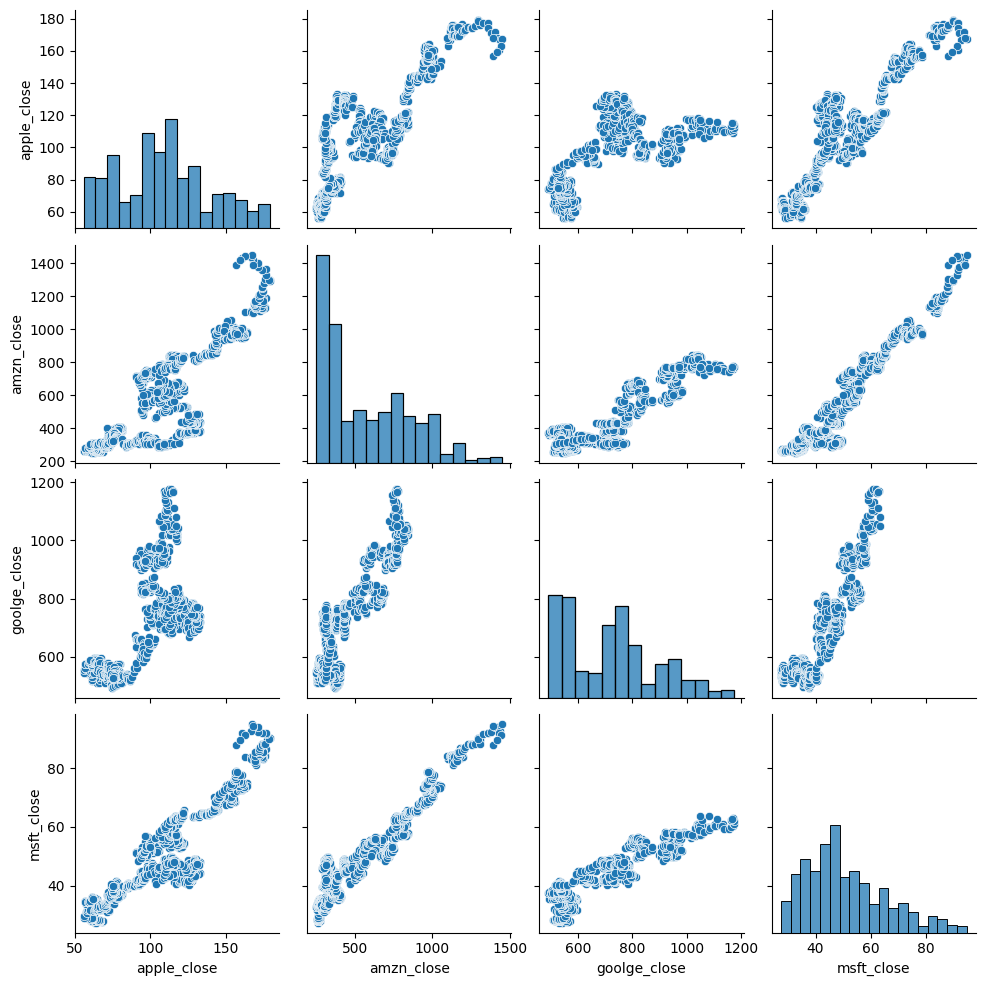

In [43]:
sns.pairplot(closing_price)

#### It allows you to visualize the relationships between multiple variables in a dataset by plotting pairwise relationships in a grid of scatterplots. 

In [44]:
closing_price.corr()

,apple_close,amzn_close,goolge_close,msft_close
apple_close,1.000000,0.819078,0.640522,0.899689
amzn_close,0.819078,1.000000,0.888456,0.955977
goolge_close,0.640522,0.888456,1.000000,0.907011
msft_close,0.899689,0.955977,0.907011,1.000000


<Axes: >

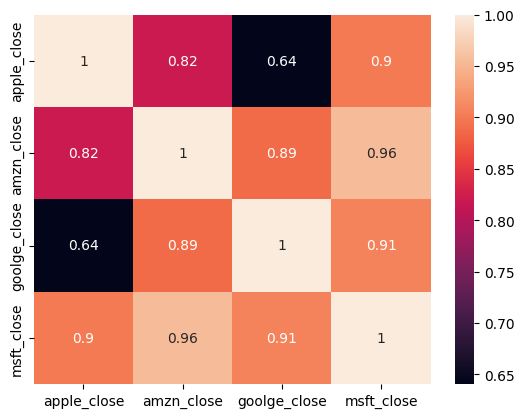

In [46]:
sns.heatmap(closing_price.corr(), annot=True)

#### Daily change  in closing price of stock or daily return in stock are co_related or not

In [47]:
(closing_price['apple_close'] - closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1)*100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [48]:
for col in closing_price.columns:
    closing_price[col+'_pct_change']=(closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1)*100

In [49]:
closing_price.columns


Index(['apple_close', 'amzn_close', 'goolge_close', 'msft_close',
       'apple_close_pct_change', 'amzn_close_pct_change',
       'goolge_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [51]:
closing_p=closing_price[['apple_close_pct_change', 'amzn_close_pct_change',
       'goolge_close_pct_change', 'msft_close_pct_change']]

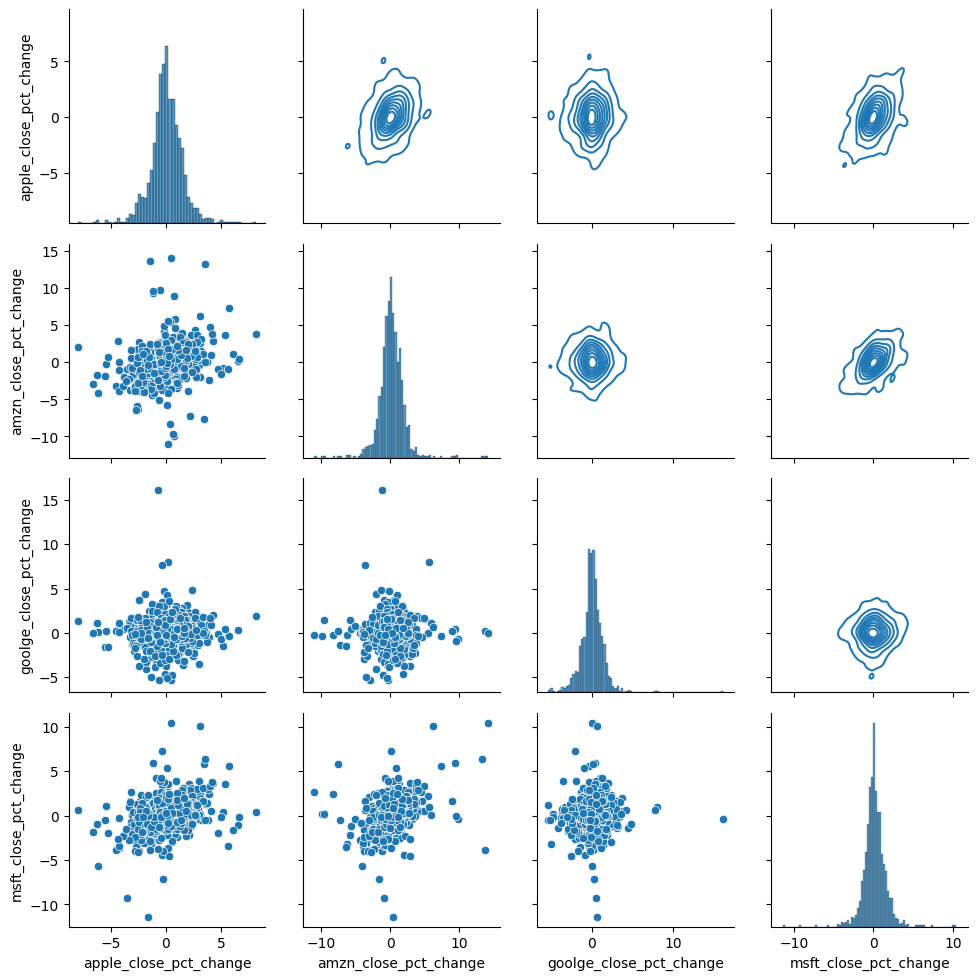

In [53]:
g=sns.PairGrid(data=closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [54]:
closing_p.corr()

,apple_close_pct_change,amzn_close_pct_change,goolge_close_pct_change,msft_close_pct_change
apple_close_pct_change,1.000000,0.287659,0.036202,0.366598
amzn_close_pct_change,0.287659,1.000000,0.027698,0.402678
goolge_close_pct_change,0.036202,0.027698,1.000000,0.038939
msft_close_pct_change,0.366598,0.402678,0.038939,1.000000
